In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ase.io

In [2]:
temperatures = np.array([])
densities = np.array([])
densities_max = np.array([])
densities_min = np.array([])
standard_deviations = np.array([])
for temp in range(300, 361, 5):
    folder = f'{temp}K/'
    sim_file = pd.read_csv(folder+'deepmd_jax.stdout', comment='#', sep='\\s+', skip_blank_lines=True)

    cell_x = np.array(sim_file['box_x'])
    number_H = 64*2
    number_O = 64
    totalmass = number_H*1.00784 + number_O*15.9994
    DENSITY_UNIT_CONVERSION=1.66054 #Conversion from uma/A³ to g/cm³
    density = totalmass/cell_x**3 * DENSITY_UNIT_CONVERSION
    mean_density = np.mean(density)
    std_density=np.std(density[1:].reshape(10,-1).mean(axis=1))

    temperatures = np.append(temperatures, temp)
    densities = np.append(densities, mean_density)
    standard_deviations = np.append(standard_deviations, std_density)

ValueError: cannot reshape array of size 604293 into shape (10,newaxis)

In [18]:
import os

if os.path.exists('density_hybrid.dat'): os.remove('density_hybrid.dat')
with open('density_hybrid.dat', 'w') as f:
    f.write("# Temperature(K) Density(g/cm³) Standard_Deviation(g/cm³)\n")
    for i in range(len(temperatures)):
        f.write(f"{temperatures[i]} {densities[i]} {standard_deviations[i]}\n")

In [19]:
temperatures_scan = np.array([])
densities_scan = np.array([])
standard_deviations_scan = np.array([])
for temp in range(300, 361, 5):
    folder = f'{temp}K/'
    sim_file = pd.read_csv('/scratch/ppena/deepmd-jax-project/water/md-runs/SCAN-big-temp/'+folder+'deepmd_jax.stdout', comment='#', sep='\\s+', skip_blank_lines=True)

    cell_x = np.array(sim_file['box_x'])
    number_H = 288*2
    number_O = 288
    totalmass = number_H*1.00784 + number_O*15.9994
    DENSITY_UNIT_CONVERSION=1.66054 #Conversion from uma/A³ to g/cm³
    density = totalmass/cell_x**3 * DENSITY_UNIT_CONVERSION
    mean_density = np.mean(density)
    std_density=np.std(density[1:].reshape(10,-1).mean(axis=1))

    temperatures_scan = np.append(temperatures_scan, temp)
    densities_scan = np.append(densities_scan, mean_density)
    standard_deviations_scan = np.append(standard_deviations_scan, std_density)

In [20]:
import os
if os.path.exists('density_scan.dat'): os.remove('density_scan.dat')
with open('density_scan.dat', 'w') as f:
    f.write("# Temperature(K) Density(g/cm³) Standard_Deviation(g/cm³)\n")
    for i in range(len(temperatures_scan)):
        f.write(f"{temperatures_scan[i]} {densities_scan[i]} {standard_deviations_scan[i]}\n")

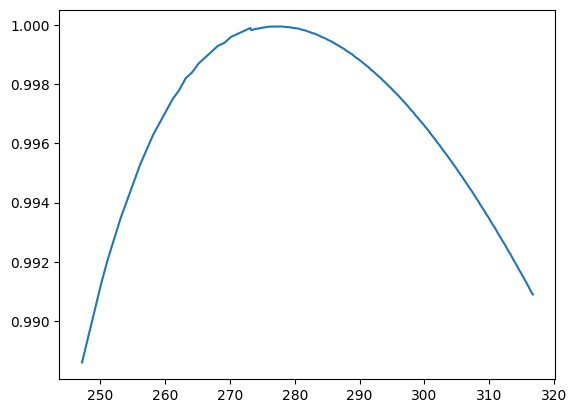

In [7]:
ref_over = np.loadtxt('/scratch/ppena/deepmd-jax-project/water/data/bibliography/density/density_nist.txt')
ref_under = np.loadtxt('/scratch/ppena/deepmd-jax-project/water/data/bibliography/density/density_hare.txt')

density_ref = np.concatenate((ref_under[::-1,1], ref_over[:,1]/1000)) # from kg/m3 to g/cm3
temperature_ref = np.concatenate((ref_under[::-1,0]+273.15, ref_over[:,0]))

density_ref = density_ref[(temperature_ref >= 247) & (temperature_ref <= 317)]
temperature_ref = temperature_ref[(temperature_ref >= 247) & (temperature_ref <= 317)]

plt.plot(temperature_ref, density_ref, label='Experiment')
plt.show()

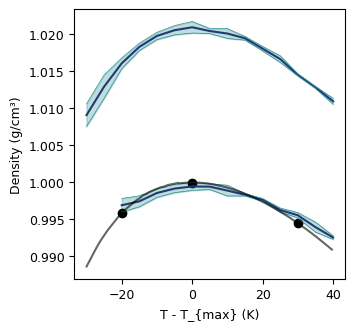

In [11]:
tmax_ref = 277.13

plt.rcParams.update({'font.size': 9, 'legend.fontsize': 6})  # leyendas más pequeñas

paletteFessa = [
    '#1F3B73', # dark-blue
    '#2F9294', # green-blue
    '#50B28D', # green
    '#A7D655', # pisello
    '#FFE03E', # yellow
    '#FFA955', # orange
    '#F4173B', #'#D6573B', # red
    '#8672AC',
]

fig = plt.figure(figsize=(3.5, 3.5))
ax = fig.add_subplot(1, 1, 1)

tmax = 320
delta_temp = temperatures - tmax
ax.plot(delta_temp, densities, color=paletteFessa[0], label='Mean Density')
ax.plot(delta_temp, densities+standard_deviations, color=paletteFessa[1], label='Max Density', linewidth=0.5)
ax.plot(delta_temp, densities-standard_deviations, color=paletteFessa[1], label='Min Density', linewidth=0.5)
ax.fill_between(delta_temp, densities-standard_deviations, densities+standard_deviations, color=paletteFessa[1], alpha=0.3)

delta_temp_first = temperatures_first - tmax
ax.plot(delta_temp_first, densities_first, color=paletteFessa[0], label='Mean Density')
ax.plot(delta_temp_first, densities_first+standard_deviations_first, color=paletteFessa[1], label='Max Density', linewidth=0.5)
ax.plot(delta_temp_first, densities_first-standard_deviations_first, color=paletteFessa[1], label='Min Density', linewidth=0.5)
ax.fill_between(delta_temp_first, densities_first-standard_deviations_first, densities_first+standard_deviations_first, color=paletteFessa[1], alpha=0.3)


ax.plot((temperature_ref-tmax_ref), density_ref, color='black', label='Experiment', alpha=0.6)
ax.set_xlabel('T - T_{max} (K)')
ax.set_ylabel('Density (g/cm³)')

ax.scatter([-20, 0, 30], [0.9958, 0.9999, 0.9945], color='black')  # puntos de referencia

plt.savefig('density-temp.png', dpi=300, bbox_inches='tight')
plt.show()

In [23]:
tmax

260

In [7]:
tmax_mb - tmax + 295

np.float64(277.87)